In [1]:
import pandas as pd
import numpy as np

In [2]:

df_example = pd.read_json("Test.json")

In [3]:
df_example.head()

,sensor,time,seconds_elapsed,z,y,x,version,device name,recording time,platform,...,device id,sensors,sampleRateMs,yaw,qx,qz,roll,qw,qy,pitch
0,Accelerometer,1.682086e+18,0.056632,-0.010534,-0.067667,-0.053797,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Accelerometer,1.682086e+18,0.066601,0.073627,-0.049665,-0.059380,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Accelerometer,1.682086e+18,0.076569,0.042944,-0.042978,-0.054415,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Accelerometer,1.682086e+18,0.086538,-0.011723,-0.052868,-0.057872,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Accelerometer,1.682086e+18,0.096507,-0.008476,-0.073644,-0.037101,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_example.columns

Index(['sensor', 'time', 'seconds_elapsed', 'z', 'y', 'x', 'version',
       'device name', 'recording time', 'platform', 'appVersion', 'device id',
       'sensors', 'sampleRateMs', 'yaw', 'qx', 'qz', 'roll', 'qw', 'qy',
       'pitch'],
      dtype='object')

In [5]:
#preprocessing data
df_example['time'] = pd.to_datetime(df_example['time'])

display(df_example.head(5))

,sensor,time,seconds_elapsed,z,y,x,version,device name,recording time,platform,...,device id,sensors,sampleRateMs,yaw,qx,qz,roll,qw,qy,pitch
0,Accelerometer,2023-04-21 14:08:00.500631808,0.056632,-0.010534,-0.067667,-0.053797,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Accelerometer,2023-04-21 14:08:00.510600704,0.066601,0.073627,-0.049665,-0.059380,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Accelerometer,2023-04-21 14:08:00.520568832,0.076569,0.042944,-0.042978,-0.054415,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Accelerometer,2023-04-21 14:08:00.530537728,0.086538,-0.011723,-0.052868,-0.057872,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Accelerometer,2023-04-21 14:08:00.540506624,0.096507,-0.008476,-0.073644,-0.037101,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_example = df_example.set_index('time')

In [7]:
df_example['sensor'].unique()

array(['Accelerometer', 'AccelerometerUncalibrated', 'Gravity',
       'Gyroscope', 'GyroscopeUncalibrated', 'Metadata', 'Orientation'],
      dtype=object)

In [8]:
df_example_acc = df_example[df_example['sensor'] == 'AccelerometerUncalibrated']
display(df_example_acc.head(2))

,sensor,seconds_elapsed,z,y,x,version,device name,recording time,platform,appVersion,device id,sensors,sampleRateMs,yaw,qx,qz,roll,qw,qy,pitch
time,,,,,,,,,,,,,,,,,,,,
2023-04-21 14:08:00.470725888,AccelerometerUncalibrated,0.026726,-0.865128,-0.503906,0.045578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-21 14:08:00.480694784,AccelerometerUncalibrated,0.036695,-0.864899,-0.509125,0.046600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_example_acc = df_example_acc[['z', 'y', 'x']]
display(df_example_acc.head(3))

,z,y,x
time,,,
2023-04-21 14:08:00.470725888,-0.865128,-0.503906,0.045578
2023-04-21 14:08:00.480694784,-0.864899,-0.509125,0.046600
2023-04-21 14:08:00.490662912,-0.867355,-0.513794,0.048141


<Axes: xlabel='time'>

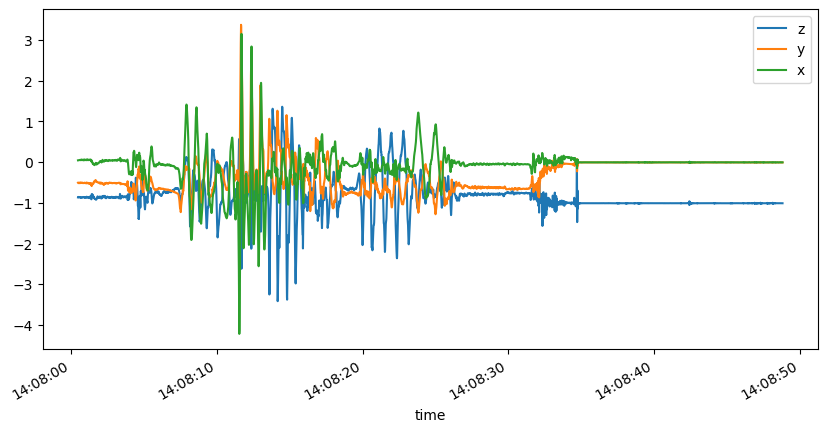

In [10]:
df_example_acc.plot(figsize=(10,5))